In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [173]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


In [3]:
b = pd.Series(df['BASIN']).unique()
s = pd.Series(df['SUBBASIN']).unique()
n = pd.Series(df['NATURE']).unique()

In [4]:
b, s, n

(array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object),
 array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object),
 array(['NR', 'TS', 'ET', 'SS', 'MX', 'DS'], dtype=object))

In [174]:
df = df.rename(columns={'WMO_WIND':'WIND', 'WMO_PRES':'PRES'})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


In [36]:
dfs = df.groupby('SID')

In [35]:
dfs.WIND.nlargest(10)

SID                  
1851175N26270  574       80.0
               576       80.0
               578       80.0
               580       80.0
               581       80.0
                         ... 
2020353N06129  697759    35.0
               697761    35.0
               697763    35.0
               697765    35.0
               697767    35.0
Name: WIND, Length: 53945, dtype: float64

<AxesSubplot:xlabel='NAME'>

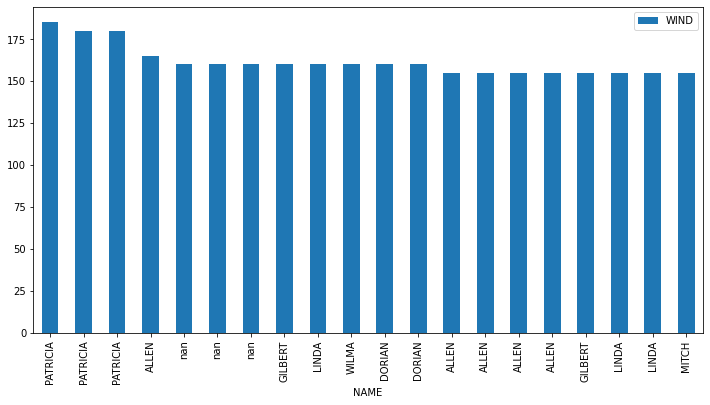

In [133]:
df.nlargest(20, 'WIND').plot(x='NAME', y='WIND', kind='bar', figsize=(12,6))

In [37]:
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 03:00:00,NR,10.9000,80.3000,NaN,NaN
1,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 06:00:00,NR,10.8709,79.8265,NaN,NaN
2,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 09:00:00,NR,10.8431,79.3524,NaN,NaN
3,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 12:00:00,NR,10.8188,78.8772,NaN,NaN
4,1842298N11080,1842,1,NI,BB,NaN,1842-10-25 15:00:00,NR,10.8000,78.4000,NaN,NaN


Text(0, 0.5, 'count')

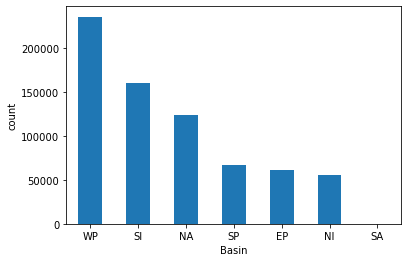

In [47]:
dfb = df['BASIN'].value_counts()
ax = dfb.plot.bar(x='BASIN', y='count', rot=0)
plt.xlabel("Basin")
plt.ylabel("count")

In [58]:
dfgb = df.groupby('BASIN')

Text(0, 0.5, 'count')

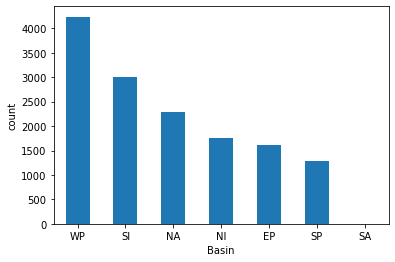

In [68]:
ax = dfgb.SID.aggregate(pd.Series.nunique).nlargest(10).plot.bar(x='BASIN', y='count', rot=0)
plt.xlabel('Basin')
plt.ylabel('count')

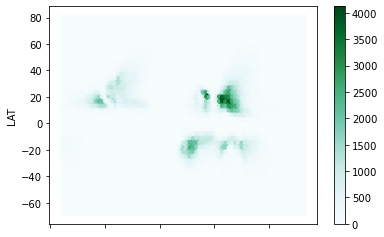

In [81]:
ax = df.plot.hexbin(x='LON', y='LAT', gridsize=75)

In [87]:
dfk = df[df['SID'] == '2005236N23285']

<AxesSubplot:xlabel='LON', ylabel='LAT'>

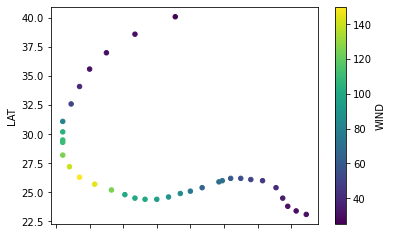

In [89]:
dfk.plot.scatter(x='LON',y='LAT',c='WIND',cmap='viridis')

In [175]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df = df.set_index('ISO_TIME')

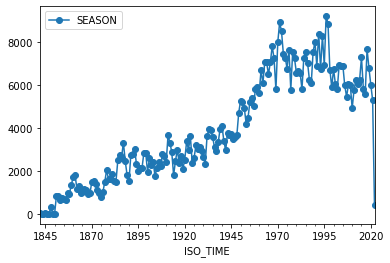

In [128]:
dfr = df.resample('A').count().plot(y='SEASON', marker='o')

In [142]:
df5 = df[df.index.year == 2005]

In [154]:
dfg5 = df5.groupby('NAME')

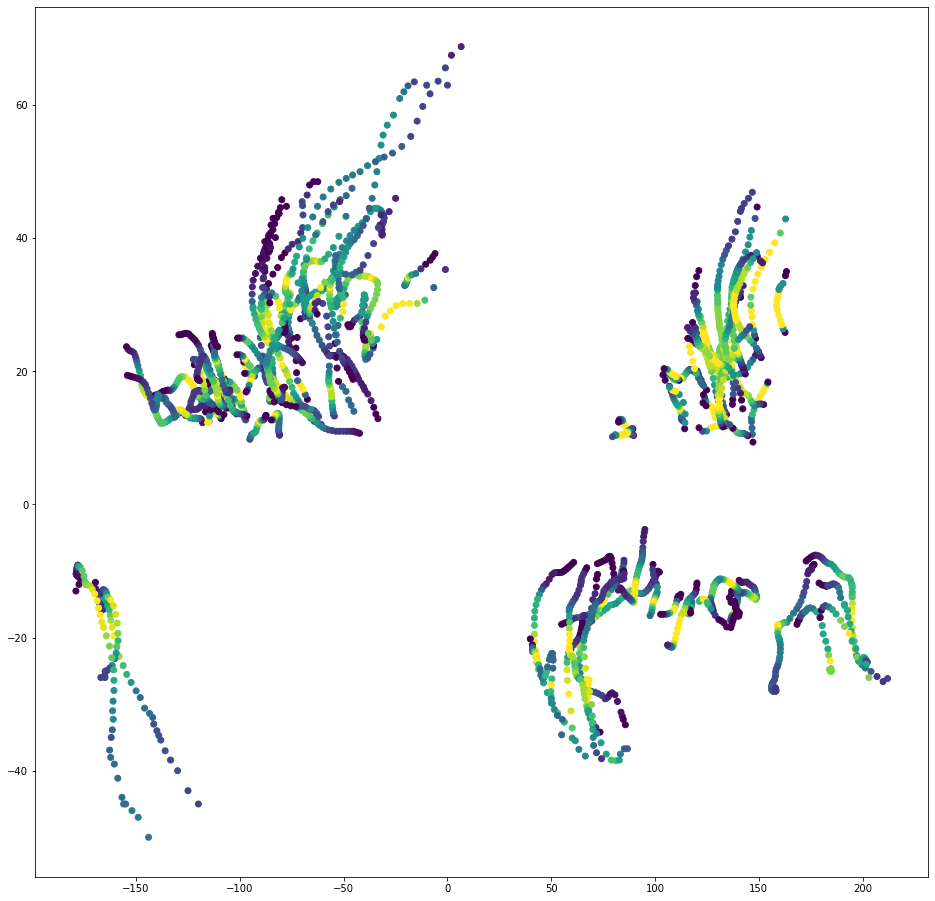

In [168]:
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(111)

for key, gp in dfg5:
    ax1.scatter(x=dfg5.get_group(key).LON,y=dfg5.get_group(key).LAT,c=dfg5.get_group(key).WIND,cmap='viridis')
    
plt.show()

In [176]:
df = df[(df['BASIN']=='NA') & (df.index.year>1970)]

In [177]:
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
ISO_TIME,,,,,,,,,,,
1971-07-04 12:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,33.500,-75.5000,25.0,NaN
1971-07-04 15:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,33.755,-75.3577,NaN,NaN
1971-07-04 18:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,34.000,-75.2000,25.0,NaN
1971-07-04 21:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,34.235,-75.0147,NaN,NaN
1971-07-05 00:00:00,1971186N34285,1971,64,NA,NA,ARLENE,TS,34.500,-74.8000,25.0,NaN


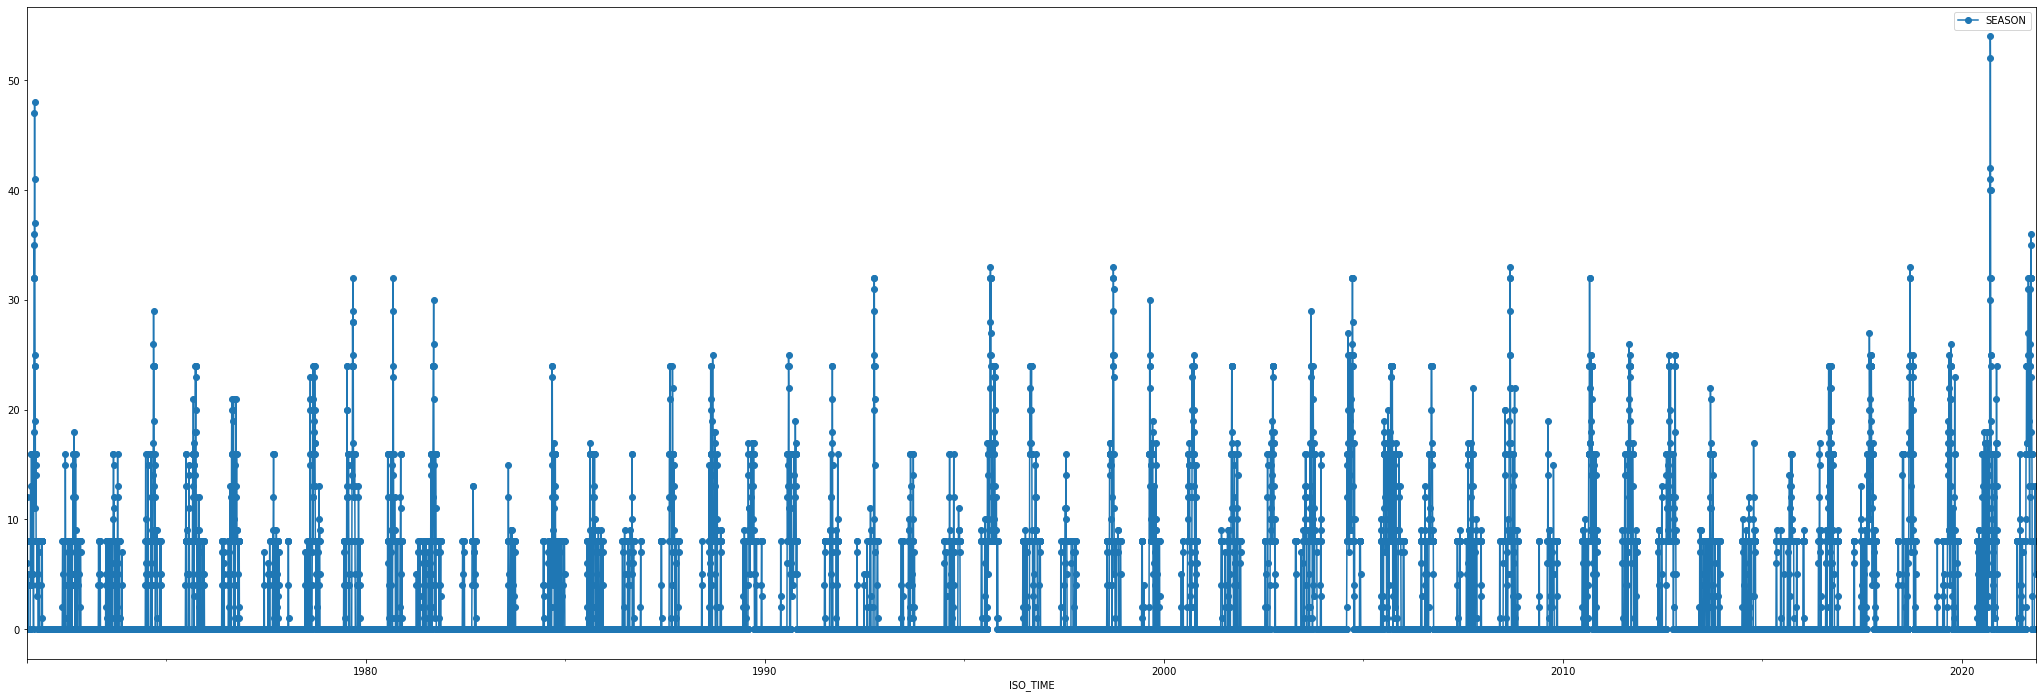

In [184]:
dfd = df.resample('D').count().plot(y='SEASON', marker='o', figsize=(36, 12))

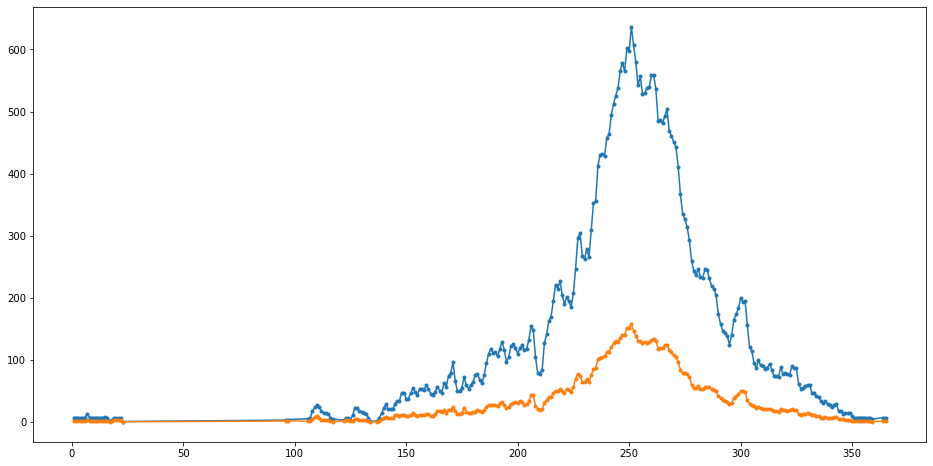

In [266]:
daily_T_climatology = df.groupby(df.index.dayofyear).count()

dtm = daily_T_climatology.mean(axis=1).to_frame()
dts = daily_T_climatology.std(axis=1).to_frame()

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)

ax.plot(dtm, marker='.')
ax.plot(dts, marker='.')

plt.show()

<AxesSubplot:xlabel='ISO_TIME'>

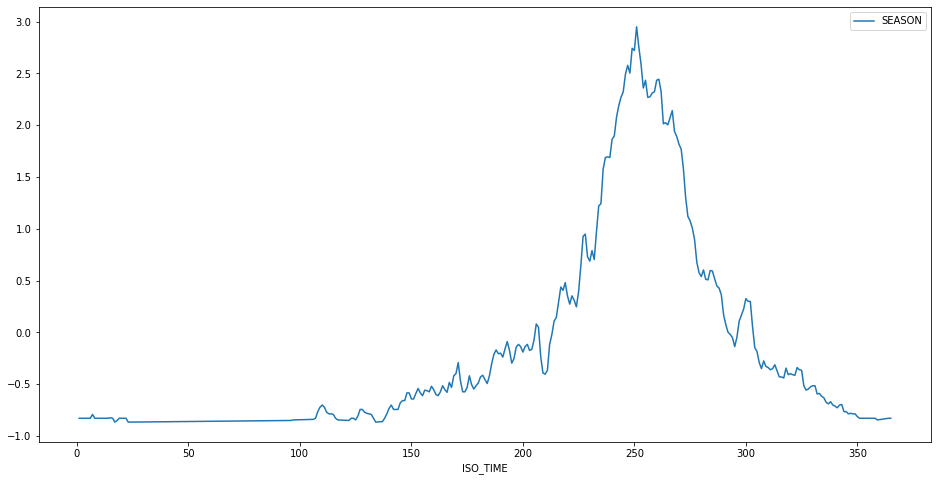

In [285]:
def standardize(x):
    return (x - x.mean())/x.std()

anomaly = daily_T_climatology.transform(standardize)
anomaly.plot(y='SEASON', figsize=(16,8))

In [287]:
yearly_T_climatology = df.groupby(df.index.year).count()

<AxesSubplot:xlabel='ISO_TIME'>

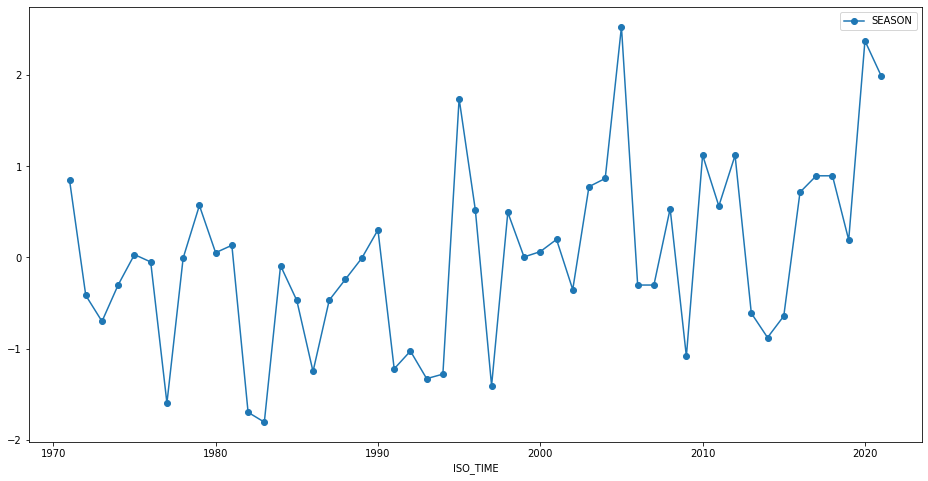

In [289]:
anomalY = yearly_T_climatology.transform(standardize)
anomalY.plot(y='SEASON', marker='o', figsize=(16,8))